# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 11

**See PrairieLearn for _due date_ and _submission_**

## Submission instructions <a name="si"></a>
<hr>

_points: 4_

You will receive marks for correctly submitting this assignment. To submit this assignment, follow the instructions below:

- **You may work on this assignment in a group (group size <= 4) and submit your assignment as a group.** 
- Below are some instructions on working as a group.  
    - The maximum group size is 4.
    - You can choose your own group members. 
    - Use group work as an opportunity to collaborate and learn new things from each other. 
    - Be respectful to each other and make sure you understand all the concepts in the assignment well. 
    - It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- Be sure to follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024s/blob/main/docs/homework_instructions.md).

## Imports

In [62]:
import os

%matplotlib inline
import string
import sys

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import os
import re
import sys
from hashlib import sha1

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# import tests_hw5
from sklearn import datasets
from sklearn.compose import make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    make_scorer,
    precision_score,
    recall_score,
)
from sklearn.model_selection import (
    GridSearchCV,
    RandomizedSearchCV,
    cross_val_score,
    cross_validate,
    train_test_split,
)
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours". Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>

_points: 3_

In this mini project, you will be working on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 

**Your tasks:**

1. Spend some time understanding the problem and what each feature means. You can find this information in the documentation on [the dataset page on Kaggle](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). Write a few sentences on your initial thoughts on the problem and the dataset. 
2. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

The dataset contains demographic data, various amounts paid/owed, and whether the person defaulted on their payments. The goal is to train a model to classify future examples by predicting whether they will default on their payments or not. This is a binary classification problem. All features are numeric, where some categorical variables like sex have been encoded as numbers, potentially incorrectly, for example marriage status should probably not be numeric, but rather should be encoded using one hot encoding. The ID feature is most likely not relevant for this problem. 

In [63]:
data = pd.read_csv("data/UCI_Credit_Card.csv")
# list(data.columns.values)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>

_points: 2_

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=76`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

In [64]:
# X = data.drop["default.payment.next.month"]

train, test =  train_test_split(data, test_size = 0.3, random_state = 76)



_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>

_points: 10_

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

In [65]:
train.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,15011.587619,167563.508571,1.604381,1.843905,1.554667,35.412952,-0.012190,-0.132714,-0.168333,-0.223143,...,43039.813952,40121.889810,38623.497095,5601.265286,6.059441e+03,5204.302571,4889.281333,4782.900857,5162.918714,0.221857
std,8658.232639,129919.112502,0.488995,0.789845,0.521970,9.136302,1.121864,1.196554,1.195375,1.165490,...,63817.414980,60400.798292,59055.005208,16239.423781,2.407470e+04,16865.645456,16486.840852,15431.523094,17170.608569,0.415505
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7493.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2300.000000,1800.000000,1266.250000,1000.000000,8.200000e+02,390.000000,291.000000,257.750000,150.000000,0.000000
50%,15041.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18990.000000,18091.000000,17127.000000,2112.500000,2.009000e+03,1801.500000,1500.000000,1500.000000,1500.000000,0.000000
75%,22505.750000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54740.000000,50065.250000,48950.500000,5012.000000,5.000000e+03,4531.250000,4048.500000,4078.000000,4001.000000,0.000000
max,29999.000000,800000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,706864.000000,823540.000000,568638.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,426529.000000,528666.000000,1.000000


<!-- END QUESTION -->
We may want to re-encode some of the categorical variables.

Features in dollars are on a much larger scale than age (years), so we may require scaling of numeric data. 
<br><br>

In [66]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21000 entries, 8958 to 2721
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          21000 non-null  int64  
 1   LIMIT_BAL                   21000 non-null  float64
 2   SEX                         21000 non-null  int64  
 3   EDUCATION                   21000 non-null  int64  
 4   MARRIAGE                    21000 non-null  int64  
 5   AGE                         21000 non-null  int64  
 6   PAY_0                       21000 non-null  int64  
 7   PAY_2                       21000 non-null  int64  
 8   PAY_3                       21000 non-null  int64  
 9   PAY_4                       21000 non-null  int64  
 10  PAY_5                       21000 non-null  int64  
 11  PAY_6                       21000 non-null  int64  
 12  BILL_AMT1                   21000 non-null  float64
 13  BILL_AMT2                   21000 

We don't have any missing values

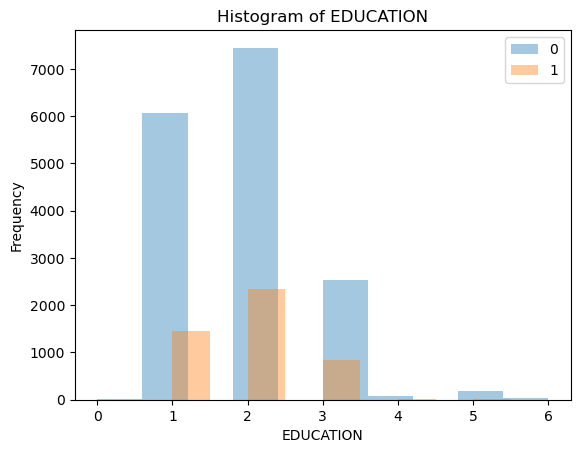

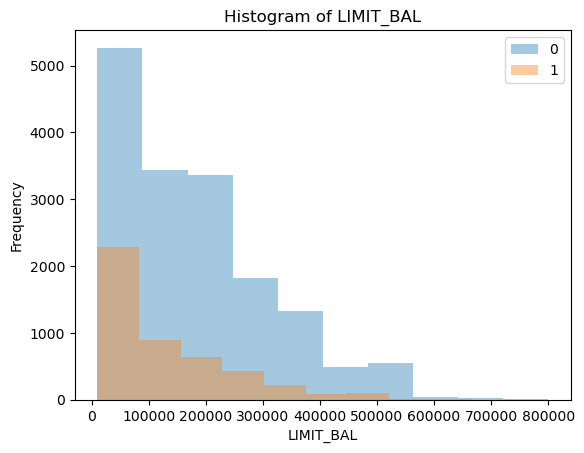

In [67]:
# Code adapted from hw3
for i in ['EDUCATION','LIMIT_BAL']:
    ax = train.groupby("default.payment.next.month")[i].plot.hist(alpha = 0.4, legend = True)
    plt.xlabel(i)
    plt.title("Histogram of " + i)
    plt.show()



# limit bal
# education

A visual inspection of feature histograms showed some features that may predict payment defaults. Above, we see that people with smaller balance limits, and a high school education (education = 3) may be more likely to default than others. 

In [68]:
train["default.payment.next.month"].value_counts(normalize=True)

default.payment.next.month
0    0.778143
1    0.221857
Name: proportion, dtype: float64

We have a class imbalance in our target feature, where the number of examples of payment default is about 22% of total examples. I'm not sure which class is more important so I will use the f1-score as a classification metric. 

In [120]:
from sklearn.metrics import f1_score, make_scorer, recall_score

f1_scorer = make_scorer(f1_score, average="macro")


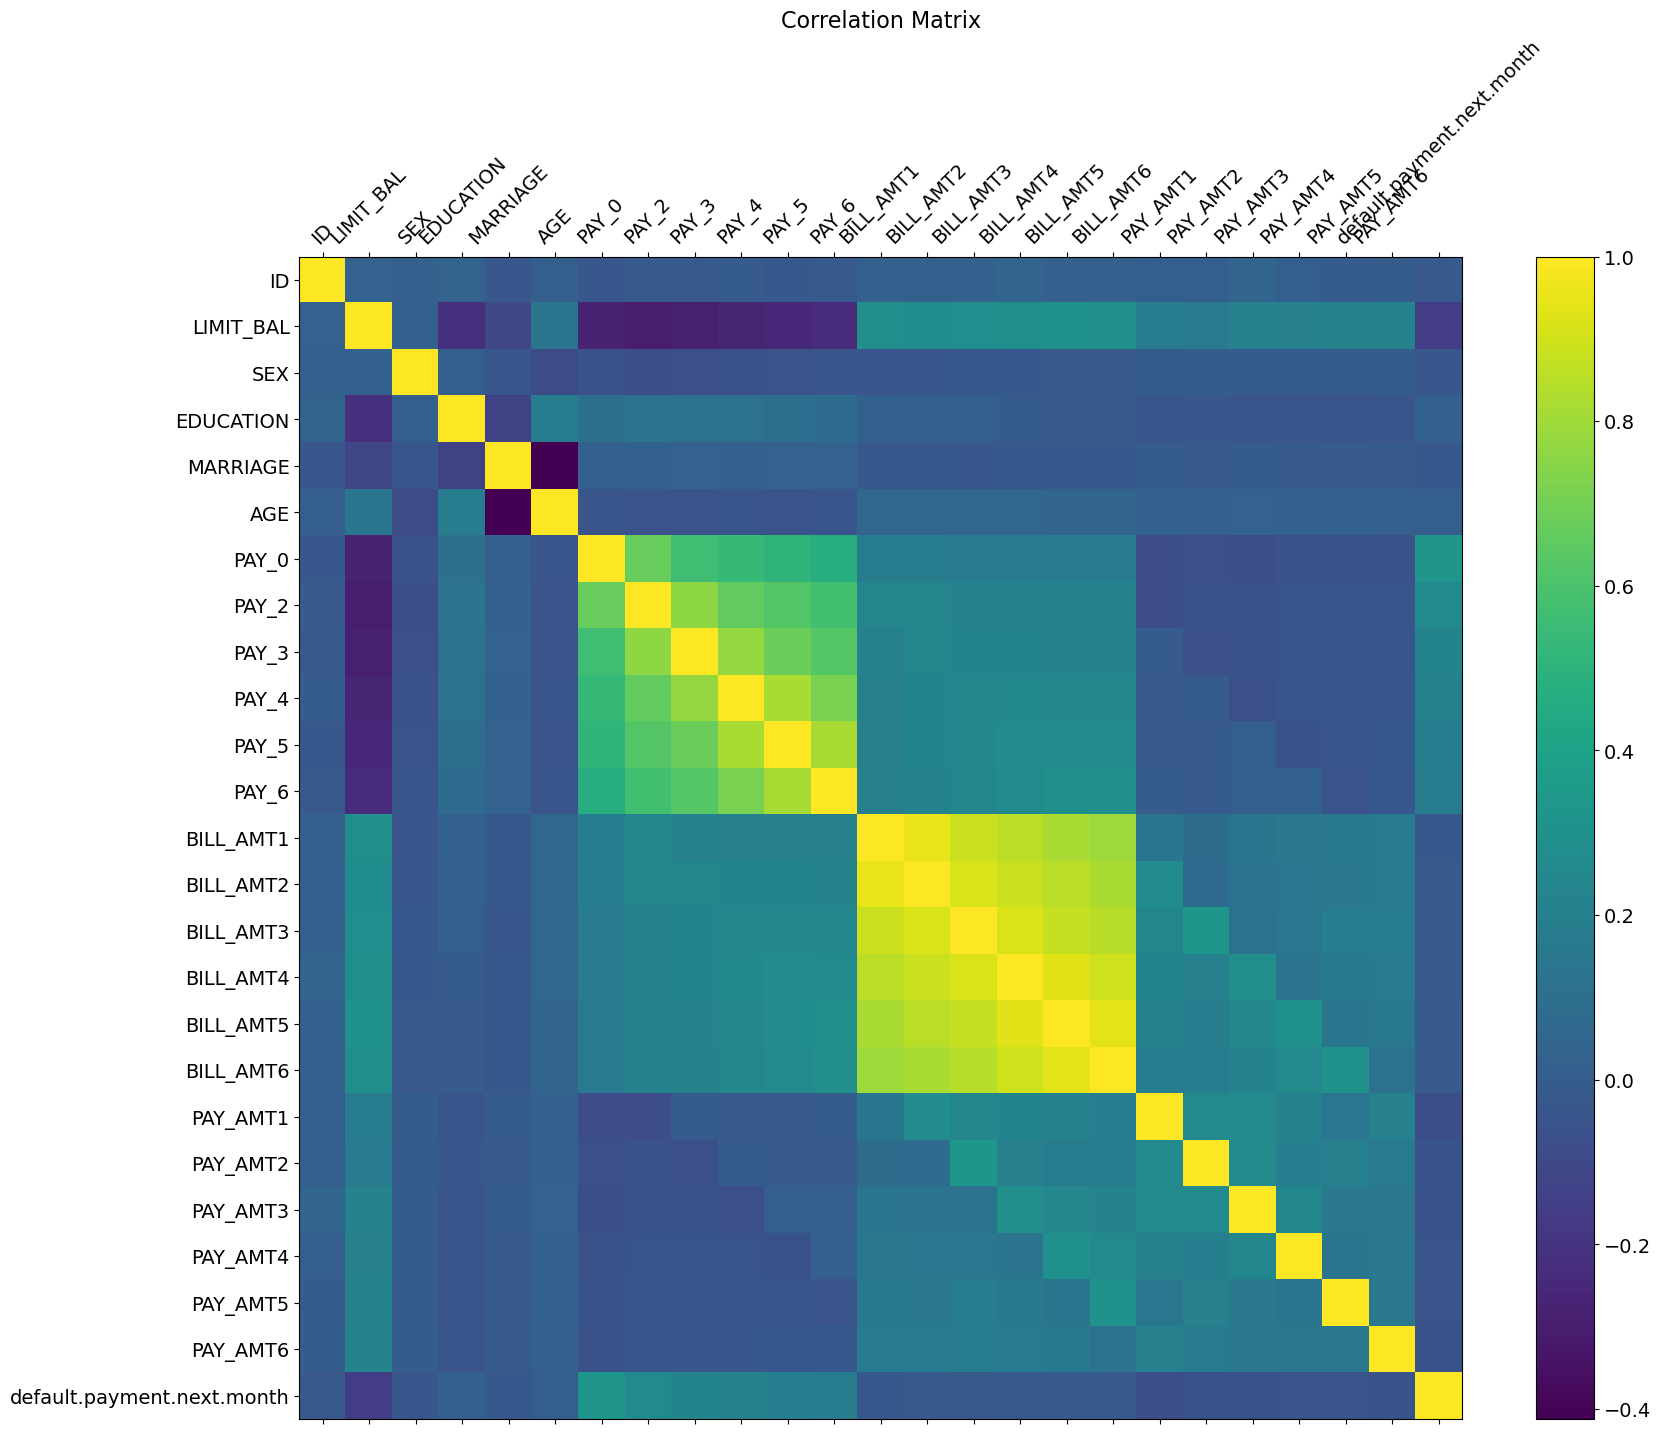

In [69]:
f = plt.figure(figsize=(19, 15))
plt.matshow(train.corr(), fignum=f.number)
plt.xticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(train.select_dtypes(['number']).shape[1]), train.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In this correlation matrix plot we see that bill amounts are correlated from month to month, and payment status from month to month as well. 

PAY_0 (latest payment status) also appears to be most closely correlated to our target feature.


Observations:
    - We have groups of colinear features
    - Categorical features like sex, education, and marriage status may need their encoding to be modified
    - Wide ranges in some numerical features which requires scaling
    - Class imbalance which we will address by using f1 score as a classification metric

<!-- BEGIN QUESTION -->

## 4. Preprocessing and transformations <a name="5"></a>
<hr>

_points: 10_

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Type your answer here, replacing this text._

<!-- END QUESTION -->

<br><br>

In [132]:
X_train, y_train = (
    train.drop(columns=["default.payment.next.month"]),
    train["default.payment.next.month"],
)
X_test, y_test = (
    test.drop(columns=["default.payment.next.month"]),
    test["default.payment.next.month"],
)

drop = ['ID']

numeric_feats = ['LIMIT_BAL',
     'AGE',
     'PAY_0',
     'PAY_2',
     'PAY_3',
     'PAY_4',
     'PAY_5',
     'PAY_6',
     'BILL_AMT1',
     'BILL_AMT2',
     'BILL_AMT3',
     'BILL_AMT4',
     'BILL_AMT5',
     'BILL_AMT6',
     'PAY_AMT1',
     'PAY_AMT2',
     'PAY_AMT3',
     'PAY_AMT4',
     'PAY_AMT5',
     'PAY_AMT6']

categorical_feats = ['SEX', 'EDUCATION', 'MARRIAGE']

target = ['default.payment.next.month']

In [277]:
 col_transformer = make_column_transformer(
     ("drop", drop),
     (StandardScaler(), numeric_feats),
     (OneHotEncoder(drop="if_binary", handle_unknown="ignore"), categorical_feats) 
 )
f1_scorer = make_scorer(f1_score, average='macro')


<!-- BEGIN QUESTION -->

## 5. Baseline model <a name="6"></a>
<hr>

_points: 2_

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_5
    
</div>

In [134]:
from sklearn.model_selection import cross_val_score

In [278]:
dummy = DummyClassifier(strategy="stratified")

pd.DataFrame(cross_validate(dummy, X_train, y_train, return_train_score = True, scoring = f1_scorer))

,fit_time,score_time,test_score,train_score
0,0.005788,0.003968,0.505813,0.503173
1,0.001945,0.002669,0.504487,0.501344
2,0.002683,0.002763,0.502326,0.505134
3,0.002038,0.002519,0.492959,0.503294
4,0.001373,0.002281,0.505430,0.504180


<br><br>

<!-- BEGIN QUESTION -->

## 6. Linear models <a name="7"></a>
<hr>

_points 10_

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Type your answer here, replacing this text._

In [279]:
logregpipe = make_pipeline(
    col_transformer,
    LogisticRegression(class_weight = "balanced", max_iter=1000)
)

pd.DataFrame(cross_validate(logregpipe, X_train, y_train, return_train_score = True, scoring = f1_scorer))['test_score'].mean()




0.6257387299988962

In [280]:
# Code adapted from lecture 7,8 notebooks




from scipy.stats import expon, lognorm, loguniform, randint, uniform, norm, randint

param_dist = {"logisticregression__C": loguniform(1e-4, 1e4)}

random_search = RandomizedSearchCV(logregpipe,                                    
                    param_distributions = param_dist, 
                    n_iter=100, 
                    n_jobs=-1, 
                    scoring = f1_scorer,
                    random_state=76,
                    return_train_score=True)

random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('drop',
                                                                               'drop',
                                                                               ['ID']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_AMT5',...
                                                                                'MARRIAGE'])])),
                                             ('logisticregression',
                                              LogisticRegression(class_weight='balanced',
                                                                 max_iter=1000))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'logisticregression__C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1728b72e0>},
                   random_state=76, return_train_score=True,
                   scoring=make_scorer(f1_score, response_method='predict', average=macro))

In [281]:
cols = [
        "mean_train_score",
        "mean_test_score",
        "param_logisticregression__C",
        "mean_fit_time",
        "rank_test_score",
        "std_test_score",
    ]
pd.DataFrame(random_search.cv_results_)[cols].set_index("rank_test_score").sort_index()[:10]

,mean_train_score,mean_test_score,param_logisticregression__C,mean_fit_time,std_test_score
rank_test_score,,,,,
1,0.630967,0.628168,0.006377,0.042695,0.003854
2,0.631404,0.628045,0.017612,0.068892,0.004183
3,0.631288,0.628003,0.018589,0.076645,0.004011
4,0.631001,0.627951,0.020567,0.068946,0.003781
5,0.630748,0.627906,0.022591,0.066484,0.003885
6,0.631312,0.627839,0.018012,0.056161,0.003956
7,0.631354,0.627821,0.007195,0.050740,0.003804
8,0.631082,0.627792,0.019547,0.075950,0.003610
9,0.631460,0.627729,0.011526,0.067315,0.004860


<!-- END QUESTION -->
The best parameter value based on this search is C = 0.006074, with a mean cross validation f1 score of 0.476623, which is an immaterial improvement over the default value before tuning. Despite this logistic regression performs significantly better than the dummy classifier. 
<br><br>

<!-- BEGIN QUESTION -->

## 7. Different models <a name="8"></a>
<hr>

_points: 12_

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Type your answer here, replacing this text._

In [282]:
from sklearn.tree import DecisionTreeClassifier

dtree = DecisionTreeClassifier()
dtreepipe = make_pipeline(col_transformer, dtree)

pd.DataFrame(cross_validate(dtreepipe, X_train, y_train, return_train_score = True, scoring = f1_scorer))

,fit_time,score_time,test_score,train_score
0,0.435152,0.006855,0.612103,0.999741
1,0.351198,0.005439,0.605222,0.999310
2,0.347279,0.005242,0.609304,0.999569
3,0.367498,0.006659,0.606086,0.999310
4,0.349615,0.006060,0.594543,0.999310


In [284]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knnpipe = make_pipeline(col_transformer, knn)

pd.DataFrame(cross_validate(knnpipe, X_train, y_train, return_train_score = True, scoring = f1_scorer))

,fit_time,score_time,test_score,train_score
0,0.027019,0.147836,0.650791,0.736483
1,0.012510,0.144754,0.650280,0.736348
2,0.012177,0.138749,0.655140,0.738341
3,0.012242,0.131972,0.646194,0.740188
4,0.013830,0.137420,0.658006,0.737541


In [285]:
from sklearn.ensemble import RandomForestClassifier

rfcpipe = make_pipeline(
    col_transformer,
    RandomForestClassifier(
                           random_state = 76)
)

result = pd.DataFrame(cross_validate(rfcpipe, X_train, y_train, return_train_score = True, scoring = f1_scorer))
result

,fit_time,score_time,test_score,train_score
0,3.680524,0.057190,0.679825,0.999741
1,3.584699,0.051585,0.693498,0.999311
2,3.642149,0.053402,0.681287,0.999569
3,3.649221,0.052273,0.677195,0.999311
4,3.642242,0.067075,0.684836,0.999311


In [286]:
result['test_score'].mean()

0.6833284210820568

<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->
Using defult hyperparameters, both the decision tree and random forest overfit our data, which is to be expected since we have not imposed a limit to tree depth. As expected, the random forest's fit time is much larger than a single decision tree's fit time. 

The KNN also somewhat overfits the data, and has a much faster fit time than the tree based models.

The model giving the best cross validation score (slight improvement over logistic regression) is the random forest. 
<br><br>

<!-- BEGIN QUESTION -->

## 8. Hyperparameter optimization <a name="10"></a>
<hr>

_points: 10_

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Type your answer here, replacing this text._

In [287]:
dt_grid = {"decisiontreeclassifier__max_depth": np.arange(1,20,1)}

grid_search_dt = GridSearchCV(dtreepipe,                                    
                    param_grid = dt_grid, 
                    n_jobs=-1, 
                    scoring = f1_scorer,
                    return_train_score=True)

grid_search_dt.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('drop',
                                                                         'drop',
                                                                         ['ID']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'PAY_0',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_A...
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore'),
                                                                         ['SEX',
                                                                          'EDUCATION',
                                                                          'MARRIAGE'])])),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             n_jobs=-1,
             param_grid={'decisiontreeclassifier__max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=macro))

In [288]:
cols = [
        "mean_train_score",
        "mean_test_score",
        "param_decisiontreeclassifier__max_depth",
        "mean_fit_time",
        "rank_test_score",
        "std_test_score",
    ]
pd.DataFrame(grid_search_dt.cv_results_)[cols].set_index("rank_test_score").sort_index()[:10]

,mean_train_score,mean_test_score,param_decisiontreeclassifier__max_depth,mean_fit_time,std_test_score
rank_test_score,,,,,
1,0.702106,0.684208,6,0.186013,0.005477
2,0.685290,0.682224,3,0.114200,0.002641
3,0.688674,0.681350,4,0.123743,0.007518
4,0.692325,0.680708,5,0.169784,0.007487
5,0.705548,0.675389,7,0.206479,0.009143
6,0.718899,0.673855,8,0.224791,0.009855
7,0.734636,0.670934,9,0.301470,0.004110
8,0.668284,0.668285,1,0.092341,0.007069
9,0.755241,0.667351,10,0.457039,0.005813


In [289]:
knn_grid = {"kneighborsclassifier__n_neighbors": np.arange(1, 20, 1)}

grid_search_knn = GridSearchCV(knnpipe,                                    
                    param_grid=knn_grid, 
                    n_jobs=-1, 
                    scoring=f1_scorer,
                    return_train_score=True)

grid_search_knn.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                        ColumnTransformer(transformers=[('drop',
                                                                         'drop',
                                                                         ['ID']),
                                                                        ('standardscaler',
                                                                         StandardScaler(),
                                                                         ['LIMIT_BAL',
                                                                          'AGE',
                                                                          'PAY_0',
                                                                          'PAY_2',
                                                                          'PAY_3',
                                                                          'PAY_4',
                                                                          'PAY_5',
                                                                          'PAY_6',
                                                                          'BILL_AMT1',
                                                                          'BILL_AMT2',
                                                                          'BILL_AMT3',
                                                                          'BILL_AMT4',
                                                                          'BILL_AMT5',
                                                                          'BILL_AMT6',
                                                                          'PAY_AMT1',
                                                                          'PAY_AMT2',
                                                                          'PAY_AMT3',
                                                                          'PAY_AMT4',
                                                                          'PAY_AMT5',
                                                                          'PAY_A...
                                                                         OneHotEncoder(drop='if_binary',
                                                                                       handle_unknown='ignore'),
                                                                         ['SEX',
                                                                          'EDUCATION',
                                                                          'MARRIAGE'])])),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
             return_train_score=True,
             scoring=make_scorer(f1_score, response_method='predict', average=macro))

In [290]:
cols = [
        "mean_train_score",
        "mean_test_score",
        "param_kneighborsclassifier__n_neighbors",
        "mean_fit_time",
        "rank_test_score",
        "std_test_score",
    ]


pd.DataFrame(grid_search_knn.cv_results_)[cols].set_index("rank_test_score").sort_index()[:10]

,mean_train_score,mean_test_score,param_kneighborsclassifier__n_neighbors,mean_fit_time,std_test_score
rank_test_score,,,,,
1,0.688181,0.665408,15,0.023868,0.007440
2,0.685536,0.664460,17,0.032580,0.005143
3,0.682775,0.664318,19,0.037907,0.008839
4,0.696172,0.663931,11,0.026172,0.006681
5,0.692003,0.663157,13,0.026273,0.007550
6,0.715168,0.660598,7,0.028906,0.006929
7,0.703660,0.659939,9,0.031928,0.005285
8,0.675165,0.655421,18,0.038814,0.006973
9,0.676498,0.653902,16,0.021651,0.007000


In [297]:

param_dist = {
    'randomforestclassifier__n_estimators': randint(100, 500),  # Random integer between 100 and 500
    'randomforestclassifier__max_depth': randint(1, 30),  # None or random integer between 1 and 30
    'randomforestclassifier__min_samples_split': randint(2, 20),   # Random integer between 2 and 20
    'randomforestclassifier__min_samples_leaf': randint(1, 10)      # Random integer between 1 and 10
}

random_search_rfc = RandomizedSearchCV(rfcpipe, param_dist, cv=5, scoring=f1_scorer, n_iter=5, n_jobs=-1, return_train_score = True)
random_search_rfc.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('drop',
                                                                               'drop',
                                                                               ['ID']),
                                                                              ('standardscaler',
                                                                               StandardScaler(),
                                                                               ['LIMIT_BAL',
                                                                                'AGE',
                                                                                'PAY_0',
                                                                                'PAY_2',
                                                                                'PAY_3',
                                                                                'PAY_4',
                                                                                'PAY_5',
                                                                                'PAY_6',
                                                                                'BILL_AMT1',
                                                                                'BILL_AMT2',
                                                                                'BILL_AMT3',
                                                                                'BILL_AMT4',
                                                                                'BILL_AMT5',
                                                                                'BILL_AMT6',
                                                                                'PAY_AMT1',
                                                                                'PAY_AMT2',
                                                                                'PAY_AMT3',
                                                                                'PAY_AMT4',
                                                                                'PAY_A...
                                        'randomforestclassifier__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x175299510>,
                                        'randomforestclassifier__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x175298df0>,
                                        'randomforestclassifier__n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x1752be8f0>},
                   return_train_score=True,
                   scoring=make_scorer(f1_score, response_method='predict', average=macro))

In [298]:
cols = [
        "mean_train_score",
        "mean_test_score",
        "param_randomforestclassifier__n_estimators",
        "param_randomforestclassifier__max_depth",
        "param_randomforestclassifier__min_samples_split",
        "param_randomforestclassifier__min_samples_leaf",
        "mean_fit_time",
        "rank_test_score",
        "std_test_score",
    ]

pd.DataFrame(random_search_rfc.cv_results_)[cols].set_index("rank_test_score").sort_index()[:10]

,mean_train_score,mean_test_score,param_randomforestclassifier__n_estimators,param_randomforestclassifier__max_depth,param_randomforestclassifier__min_samples_split,param_randomforestclassifier__min_samples_leaf,mean_fit_time,std_test_score
rank_test_score,,,,,,,,
1,0.776578,0.681717,280,18,4,5,12.433386,0.006371
2,0.748567,0.681707,483,22,18,7,22.649905,0.005929
3,0.743639,0.681149,448,16,4,8,17.255740,0.006637
4,0.710129,0.678540,289,8,14,3,7.764251,0.008245
5,0.699949,0.674876,331,7,9,4,7.793778,0.010970


<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Results on the test set <a name="12"></a>
<hr>

_points: 10_

**Your tasks:**

1. Try your best performing model on the test data: report and explain test scores.
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias?

<div class="alert alert-warning">
    
Solution_9
    
</div>

In [300]:

mod = grid_search_dt.best_estimator_

print(grid_search_dt.best_score_)

predictions = mod.predict(X_test)

f1_score(y_test, predictions, average = "macro")

0.6842081010805892


0.6827228924668076

The test score is 0.02 below the cross validation score which indicates our model is a good fit and I don't think there is optimization bias here. 

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Summary of results <a name="13"></a>
<hr>

_points 12_

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table (printed `DataFrame`) summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Type your answer here, replacing this text._

In [301]:
pd.DataFrame()

""


<!-- END QUESTION -->

<br><br>

<!-- END QUESTION -->

<br><br>

## Submission instructions 

**PLEASE READ:** When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from “1” will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Upload the assignment using PrairieLearn.
4. Make sure that the plots and output are rendered properly in your submitted file.

This was a tricky one but you did it!